# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '/Users/valentine/mlbd-2025/project/Lernnavi/Lernnavi_Data' #You many change the directory
users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the transactions table?


In [2]:
# Your code goes here

print('There are', transactions.user_id.nunique(), 'distinct participants in the transaction table')

There are 22470 distinct participants in the transaction table


#### b) How many transactions did each user do? Please provide a visualization and discuss the distribution.

Text(0.5, 1.0, 'Number of transactions per user')

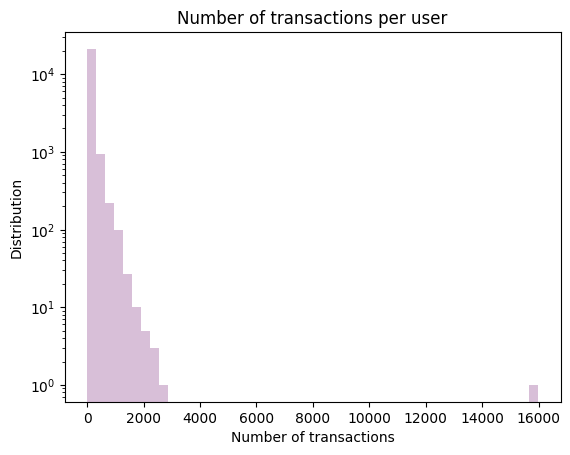

In [3]:
# Your code goes here
transaction_counts = transactions['user_id'].value_counts()
fig = plt.hist(transaction_counts, bins=50, color='thistle') 
plt.yscale('log')
plt.xlabel('Number of transactions')
plt.ylabel('Distribution')
plt.title('Number of transactions per user')

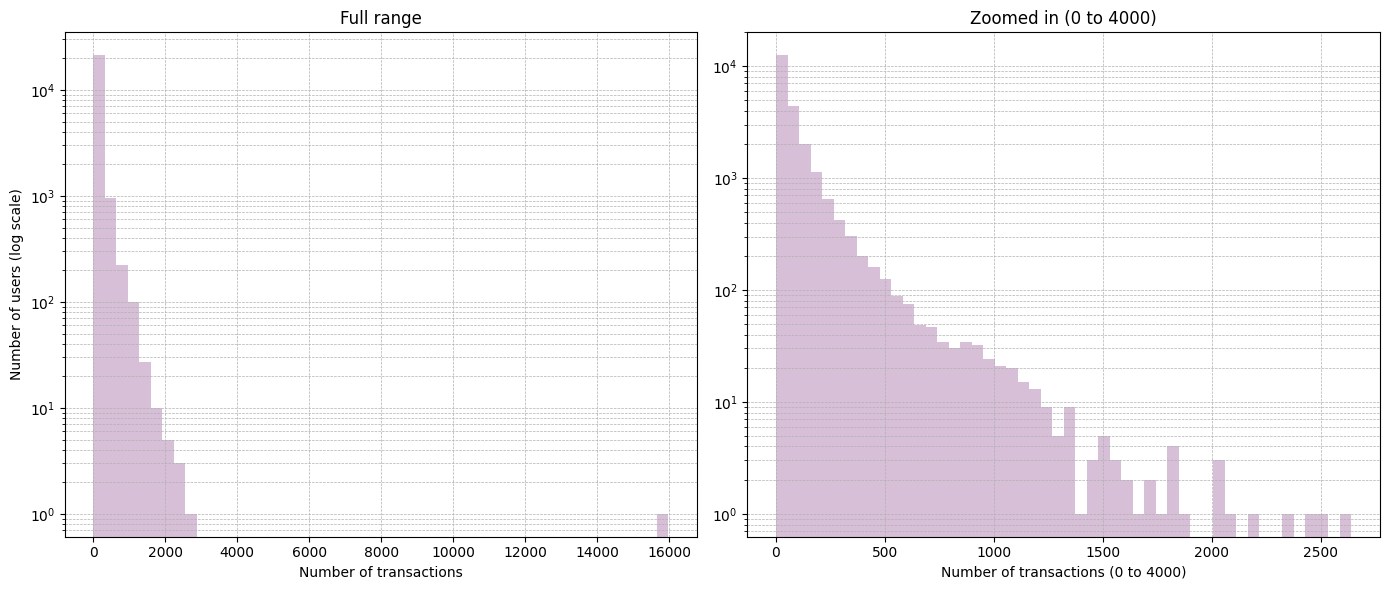

In [4]:
filtered_counts = transaction_counts[transaction_counts <= 4000]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Full range
axes[0].hist(transaction_counts, bins=50, color='thistle')
axes[0].set_yscale('log')
axes[0].set_xlabel('Number of transactions')
axes[0].set_ylabel('Number of users (log scale)')
axes[0].set_title('Full range')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Zoomed in
axes[1].hist(filtered_counts, bins=50, color='thistle')
axes[1].set_yscale('log')
axes[1].set_xlabel('Number of transactions (0 to 4000)')
axes[1].set_title('Zoomed in (0 to 4000)')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

*Your discussion/interpretation goes here*

Once we removed the outliers around 16000 transactions, the distribution is right skewed, it could be gamma distributed. 
The majority of users have a low number of transactions, while a smaller subset of users have significantly higher transaction counts, this suggests an imbalance in engagement: most users interact minimally, while a few are highly active.
The spike at zero transactions suggests that there are many users that have never used their account after registering. 

#### c) Which are the 8 most popular event actions? Please provide a visualization of the frequency of the top 8 event actions.

Hint: See actions in table events.

Text(0.5, 1.0, 'Top 8 event actions')

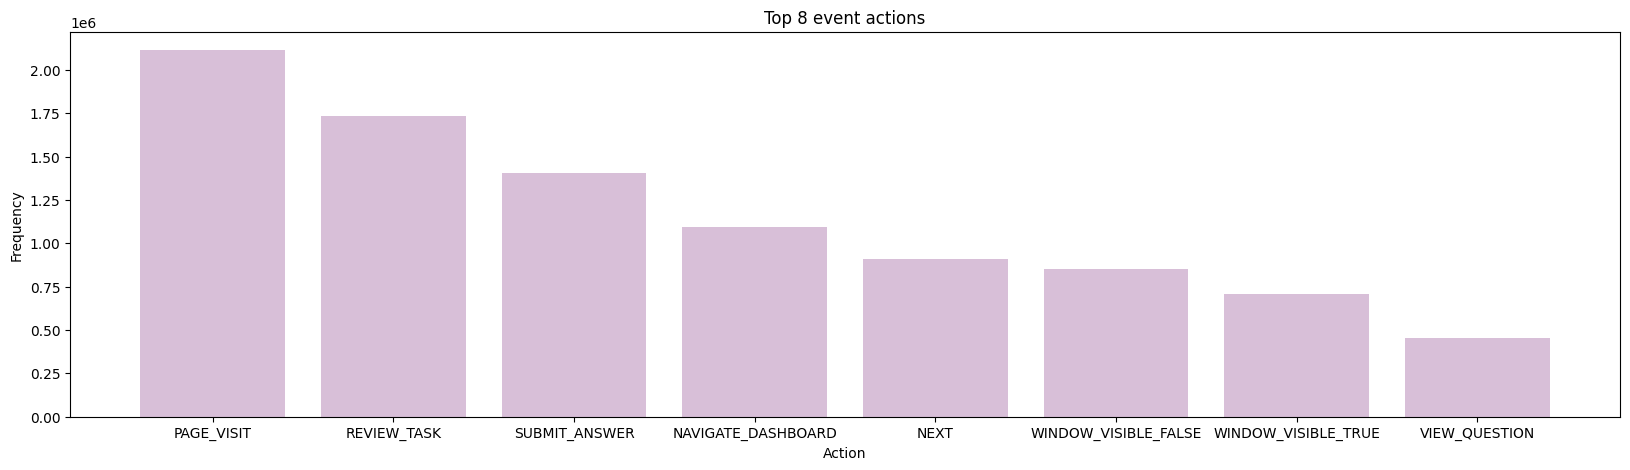

In [5]:
# Your code goes here

top_8 = events.action.value_counts().head(8)

plt.figure(figsize=(20,5))
plt.bar(top_8.index, top_8.values, color='thistle')
#plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Action')
plt.title('Top 8 event actions')

*Your discussion/interpretation goes here*

The most frequent action is PAGE_VISIT which is expected since all other actions take place from a page. Same for REVIEW_TASK which is the second most popular event since it happens every time a new question appears. 
SUBMIT_ANSWER happens every time a student answer a question, the fact that it is slightly less frequent than REVIEW_TASK suggests that some questions are not answered by the user. 
NEXT being less frequent than SUBMIT_ANSWER and NAVIGATE_DASHBOARD probably takes into account the questions that are the last of the current session and the users going back to the menu without finishing the session. 
WINDOW_VISIBLE_FALSE/TRUE being part of the 8 most frequent events suggests that users might be searching infos on other tabs while working on the quizzes. 
The low frequency of VIEW_QUESTION as well as the absence of OPEN_FEEDBACK in the top-8 events suggests that users don't often go back on the questions. 

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

In [6]:
# Your code for building the data frame here

# Feedback
num_feedback = pd.DataFrame(events.loc[events.action == 'OPEN_FEEDBACK'].user_id.value_counts()).reset_index()
num_feedback.columns = ['user_id', 'num_feedback']

# Pages visited 
num_feedback = pd.DataFrame(events.loc[events.action == 'OPEN_FEEDBACK'].user_id.value_counts()).reset_index()
num_feedback.columns = ['user_id', 'num_feedback']

num_pages_visited = pd.DataFrame(events.loc[events.action == 'PAGE_VISIT'].user_id.value_counts()).reset_index()
num_pages_visited.columns = ['user_id', 'num_pages_visited']

# Percentage correct 
eval_map = {'CORRECT':1, 'PARTIAL':0.5, 'WRONG':0}
transactions['evaluation'] = transactions['evaluation'].map(eval_map).fillna(0)
correct = transactions[['user_id', 'evaluation']]

correct['evaluation'] = correct['evaluation'].fillna(0)

correct['num_answer'] = correct.groupby('user_id').transform('count')
correct['num_correct'] = correct.groupby('user_id')['evaluation'].transform('sum')
correct['percentage_correct'] = correct['num_correct']/correct['num_answer']

percentage_correct = correct[['user_id', 'percentage_correct']].drop_duplicates()

# Clicks
num_click = pd.DataFrame(events.loc[events.event_type == 'CLICK'].user_id.value_counts()).reset_index()
num_click.columns = ['user_id', 'num_clicks']

# Gender 
gender = users[['user_id', 'gender']]

# Merge all into a single df 
df = gender.merge(num_pages_visited, on='user_id', how='outer').merge(num_feedback, on='user_id', how='outer').merge(percentage_correct, on='user_id', how='outer').merge(num_click, on='user_id', how='outer')
df['num_feedback'] = df['num_feedback'].fillna(0)
df['num_pages_visited'] = df['num_pages_visited'].fillna(0)

# Display df
df.head()

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/1077448368.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct['evaluation'] = correct['evaluation'].fillna(0)
/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/1077448368.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct['num_answer'] = correct.groupby('user_id').transform('count')
/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/1077448368.py:22: SettingWithCopyWarning: 
A value is trying to

,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks
0,387604,NaN,1341.0,46.0,0.295508,1408.0
1,387605,NaN,862.0,78.0,0.283195,959.0
2,387608,NaN,716.0,11.0,0.268698,516.0
3,387613,NaN,37.0,0.0,0.333333,38.0
4,387615,MALE,211.0,1.0,0.287500,109.0


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_pages_visited, num_feedback, percentage_correct, num_clicks) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [7]:
# Your code for univariate analysis here
df.describe(include='all')

,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks
count,30929.000000,26712,30929.000000,30929.000000,22470.000000,22468.000000
unique,NaN,3,NaN,NaN,NaN,NaN
top,NaN,FEMALE,NaN,NaN,NaN,NaN
freq,NaN,15342,NaN,NaN,NaN,NaN
mean,407965.363704,NaN,68.349510,9.105758,0.410017,192.928654
std,12671.651629,NaN,121.530386,30.497469,0.178944,326.270371
min,387604.000000,NaN,0.000000,0.000000,0.000000,1.000000
25%,396919.000000,NaN,0.000000,0.000000,0.308824,37.000000
50%,407405.000000,NaN,30.000000,0.000000,0.419753,92.000000
75%,417594.000000,NaN,81.000000,5.000000,0.527027,208.000000


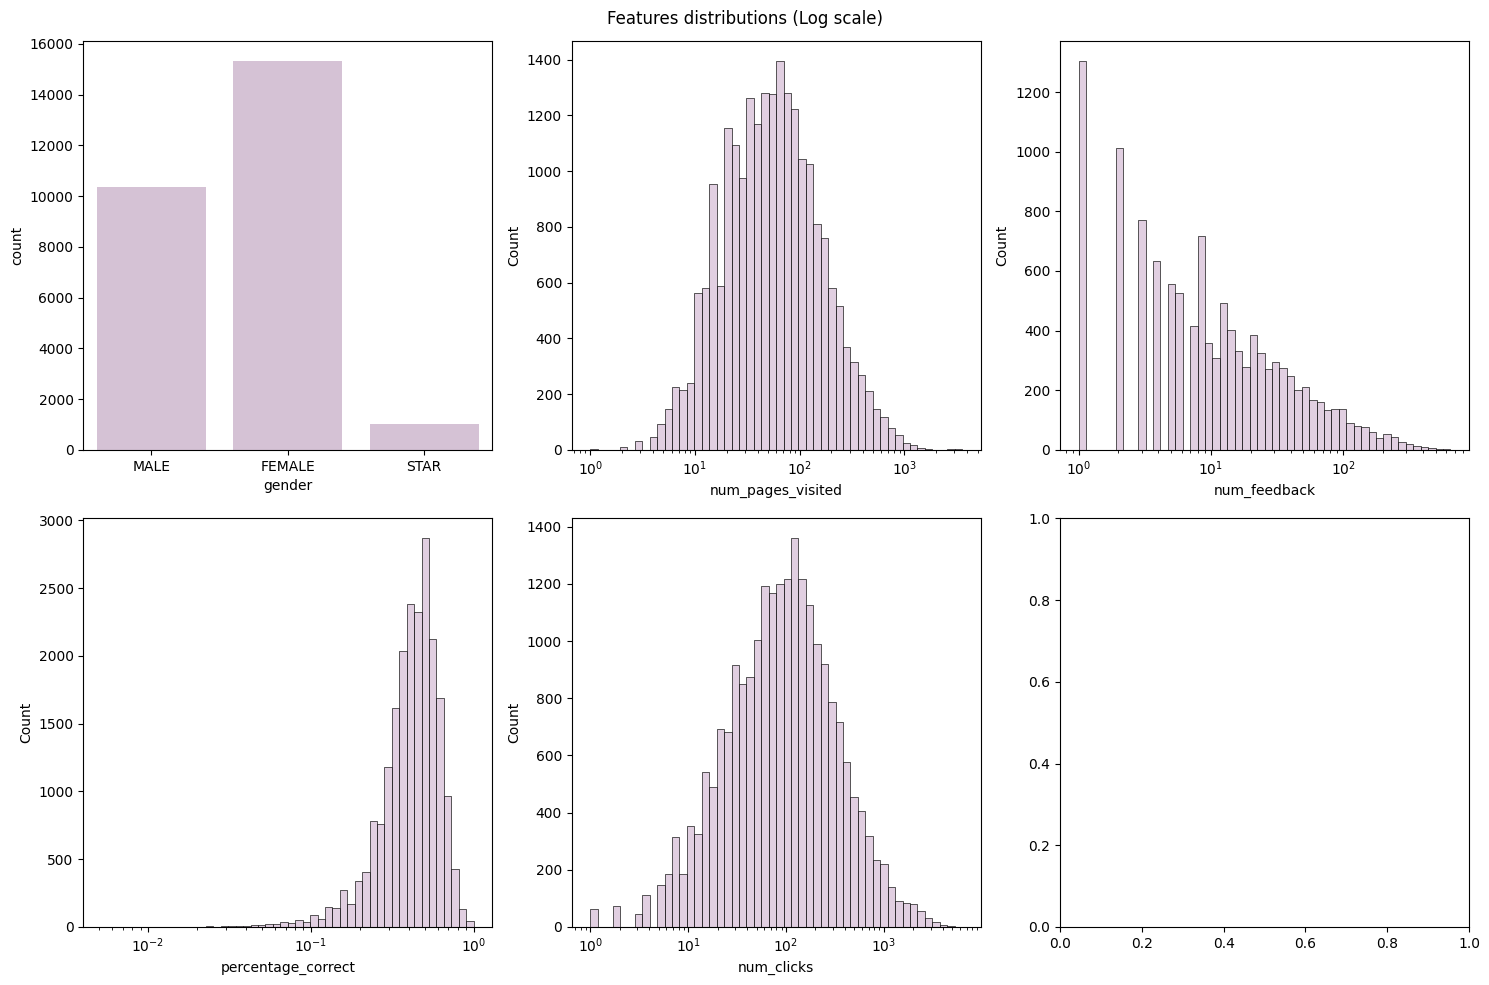

In [8]:
import seaborn as sns

def plot_features(df, title, log):
    continuous_cols = list(df._get_numeric_data().columns)
    categorical_cols = list(set(df.columns) - set(continuous_cols))
    fig, axes = plt.subplots(2, 3, figsize=(15,10))
    for i, col in enumerate(df.columns):
        ax = axes[i // 3, i % 3]
        data = df[~df[col].isna()]
        if col in continuous_cols:
            sns.histplot(data=data[col], bins=50, ax=ax, log_scale=log, color='thistle') #Filter out nan values in the features
        elif col in categorical_cols:
            sns.countplot(data=data, x=col, ax=ax, color='thistle')
        else:
            print(col)
    fig.suptitle(title)
    fig.tight_layout()

plot_features(df.drop('user_id', axis=1),"Features distributions (Log scale)", True)
plt.show()

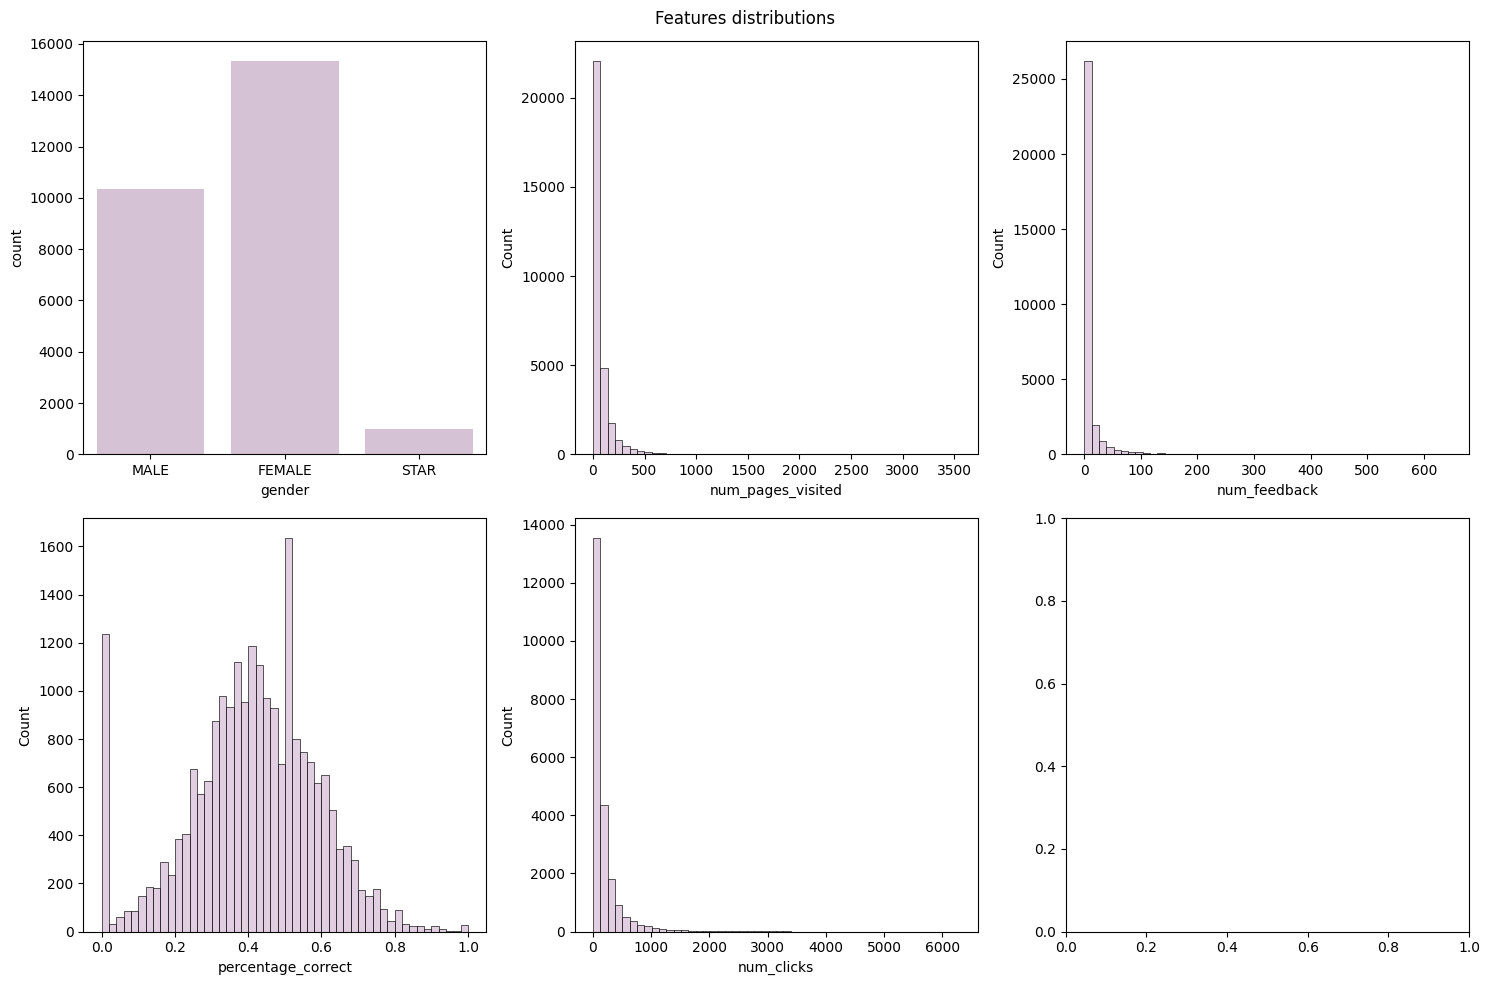

In [9]:
plot_features(df.drop('user_id', axis=1),"Features distributions", False)
plt.show()

*Your discussion/interpretation goes here*

Gender: The distribution is unbalanced with Female users being more represented than Male, there are only few missing values (STAR)

Pages visited and Clicks: A log-normal distribution suggests that most users are only sparsly active, while a small subset of users are highly active.

Feedback: Right skewed distribution, could be gamma distributed. 

Percentage correct: The normal distribution with a mean around 40% suggests that questions difficulty and/or users levels are well balanced. There is a spike at 50% 

All events show a spike at zero which is expected since we've seen that many users do not use their account. 
The difference of distribution between the number of pages visited and number of clicks vs the number of feedback opened shows that even in the active users only few use the feedback function. 

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [10]:
# Your code for computing the features and adding them to the df goes here

# First feature: Mean time needed to answer a question 
time = transactions[['user_id', 'start_time', 'commit_time']]
time['start_time'] = pd.to_datetime(time['start_time'])
time['commit_time'] = pd.to_datetime(time['commit_time'])

time['time_to_answer'] = (time.commit_time - time.start_time).dt.seconds
mean_time = pd.DataFrame(time.groupby('user_id')['time_to_answer'].mean()).reset_index()


# Second feature: The number of time the student reached a theory page
num_theory = pd.DataFrame(events.loc[events.action == 'GO_TO_THEORY'].user_id.value_counts()).reset_index()
num_theory.columns = ['user_id', 'num_theory']

# Merge both to the df 
df = df.merge(num_theory, on='user_id', how='outer').merge(mean_time, on='user_id', how='outer')

# Display df 
df.head()

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/921162412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['start_time'] = pd.to_datetime(time['start_time'])
/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/921162412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['commit_time'] = pd.to_datetime(time['commit_time'])
/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_32179/921162412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks,num_theory,time_to_answer
0,387604,NaN,1341.0,46.0,0.295508,1408.0,677.0,158.718182
1,387605,NaN,862.0,78.0,0.283195,959.0,35.0,364.439024
2,387608,NaN,716.0,11.0,0.268698,516.0,58.0,411.233083
3,387613,NaN,37.0,0.0,0.333333,38.0,7.0,15.555556
4,387615,MALE,211.0,1.0,0.287500,109.0,18.0,46.142857


*Your feature descriptions and arguments/hypotheses go here*

Time to answer: Using events start date and commit date this is a measure of the mean time taken by a user to answer questions. 
    Hypothesis: Most users take a few seconds to answer 

Num theory: The number of time a user who reached for a theory page. 
    Hypothesis: Only a few active users reach regularly to theory pages, most users do not use them

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [11]:
# Your code for univariate analysis goes here
df[['num_theory', 'time_to_answer']].describe(include='all')

,num_theory,time_to_answer
count,11565.000000,21574.000000
mean,18.280847,567.450786
std,53.223441,2091.411983
min,1.000000,0.333333
25%,2.000000,56.666667
50%,6.000000,104.934375
75%,16.000000,332.123257
max,3000.000000,86350.000000


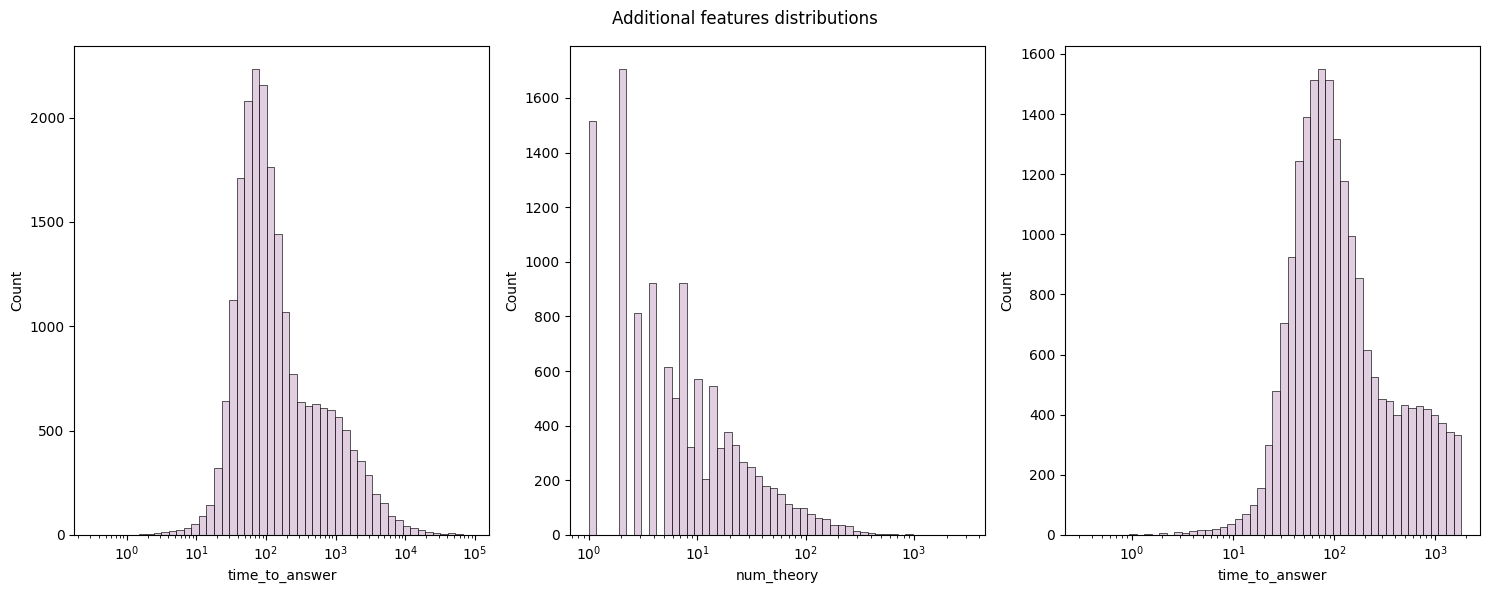

In [12]:
filtered_times = df[df['time_to_answer'] <= 1800]

fig, axes = plt.subplots(1, 3, figsize=(15,6))

sns.histplot(data=df['time_to_answer'], bins=50, ax=axes[0], log_scale=True, color='thistle')
sns.histplot(data=df, x='num_theory', ax=axes[1], bins=50, log_scale=True, color='thistle')
sns.histplot(data=filtered_times, x='time_to_answer', ax=axes[2], bins=50, log_scale=True, color='thistle')

fig.suptitle('Additional features distributions')
fig.tight_layout()

plt.show()

*Your discussion/interpretation goes here*



e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

In [13]:
# Your code for multivariate analysis goes here
from scipy.stats import spearmanr, pearsonr

Spearman correlation: -0.084 (p-value: 0.000)
Pearson correlation: -0.074 (p-value: 0.000)


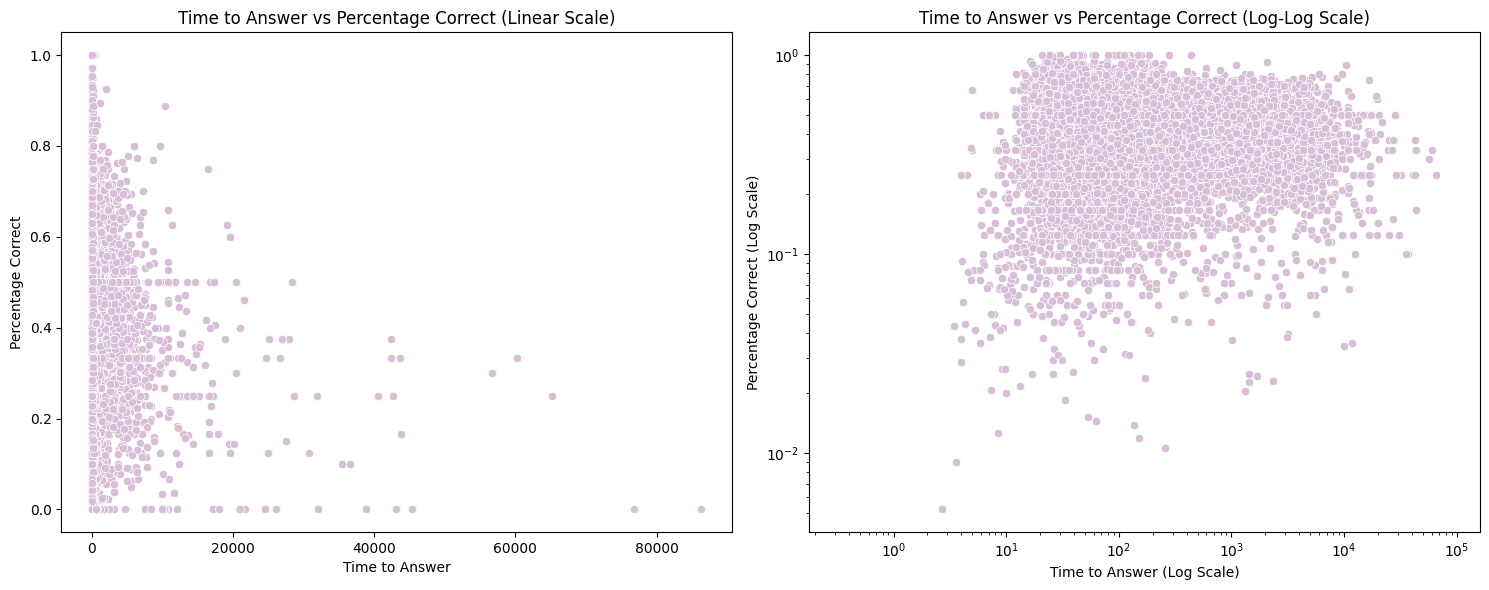

In [14]:
# Correlation between time to answer and percentage of correct answers
df['time_to_answer'] = df['time_to_answer'].fillna(df['time_to_answer'].mean())
df['percentage_correct'] = df['percentage_correct'].fillna(df['percentage_correct'].mean())


# Spearman correlation
corr, p_value = spearmanr(df["time_to_answer"], df["percentage_correct"])
print(f"Spearman correlation: {corr:.3f} (p-value: {p_value:.3f})")
corr, p_value = pearsonr(df["time_to_answer"], df["percentage_correct"])
print(f"Pearson correlation: {corr:.3f} (p-value: {p_value:.3f})")

# Scatter plot
# Create subplots for linear and log-log plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Scale Plot
sns.scatterplot(data=df, x="time_to_answer", y="percentage_correct", color="thistle", ax=axes[0])
axes[0].set_xlabel("Time to Answer")
axes[0].set_ylabel("Percentage Correct")
axes[0].set_title("Time to Answer vs Percentage Correct (Linear Scale)")

# Log-Log Scale Plot
sns.scatterplot(data=df, x="time_to_answer", y="percentage_correct", color="thistle", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("Time to Answer (Log Scale)")
axes[1].set_ylabel("Percentage Correct (Log Scale)")
axes[1].set_title("Time to Answer vs Percentage Correct (Log-Log Scale)")

# Show plot
plt.tight_layout()
plt.show()

Spearman correlation: 0.645 (p-value: 0.000)
Pearson correlation: 0.646 (p-value: 0.000)


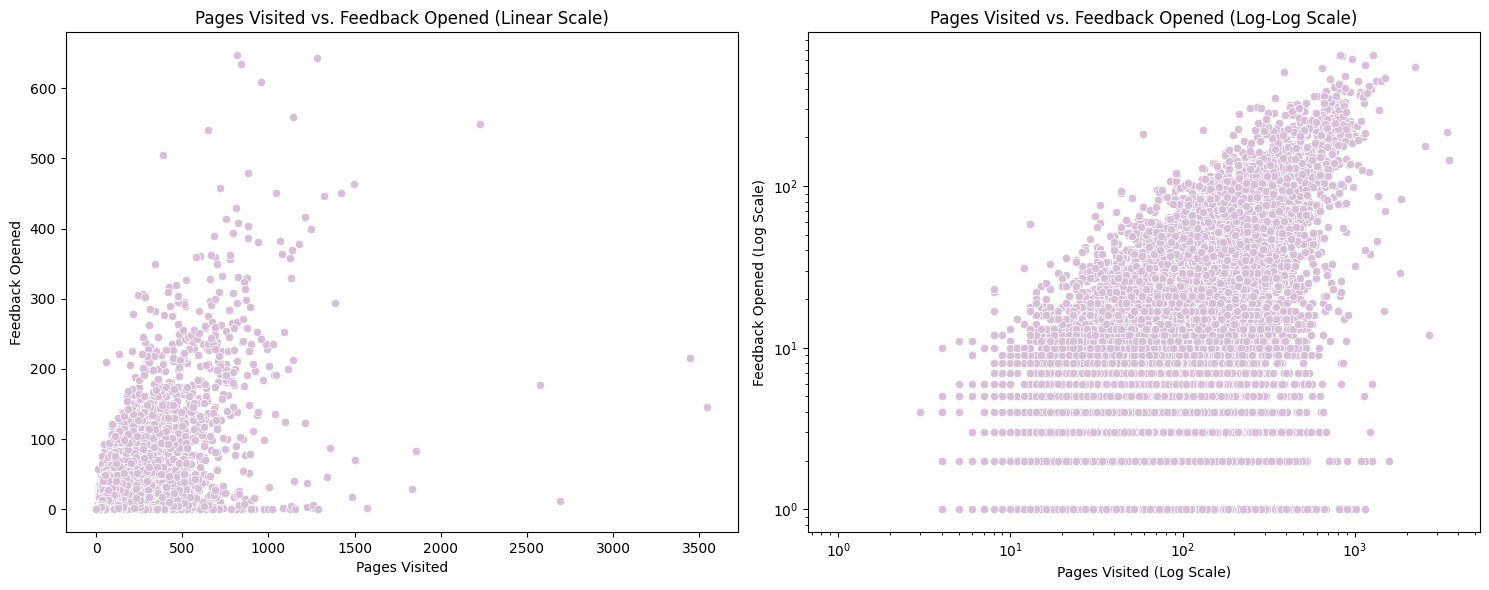

In [15]:
# Multivariate analysis of num_pages_visited and num_feedback

# Compute Pearson correlation
corr, p_value = spearmanr(df["num_pages_visited"], df["num_feedback"])
print(f"Spearman correlation: {corr:.3f} (p-value: {p_value:.3f})")
corr, p_value = pearsonr(df["num_pages_visited"], df["num_feedback"])
print(f"Pearson correlation: {corr:.3f} (p-value: {p_value:.3f})")

# Scatter plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot (linear scale)
sns.scatterplot(data=df, x="num_pages_visited", y="num_feedback", color="thistle", ax=axes[0])
axes[0].set_xlabel("Pages Visited")
axes[0].set_ylabel("Feedback Opened")
axes[0].set_title("Pages Visited vs. Feedback Opened (Linear Scale)")

# Scatter plot (log-log scale)
sns.scatterplot(data=df, x="num_pages_visited", y="num_feedback", color="thistle", ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel("Pages Visited (Log Scale)")
axes[1].set_ylabel("Feedback Opened (Log Scale)")
axes[1].set_title("Pages Visited vs. Feedback Opened (Log-Log Scale)")

# Display the plots
plt.tight_layout()
plt.show()



*Your discussion/interpretation goes here*

Time to answer vs Percentage correct: There is an extremely small but significant correlation between the time taken to answer and the percentage of correct answers of a user. This might be due to the fact that both features distributions resemble a gaussian having most users in the average. The fact that this correlation is negative could suggest that students having more difficulties tend to spend more time answering

Pages visited vs Feedback opened: There is a significant positive Pearson correlation (p-value < 0.05) between the number of pages visited and the number of feedback consulted. This can be explained in part by the fact that consulting a feedback imply visiting a new page, however it could also suggest that more active users (i.e users visiting more pages) are more prompt to consult feedback, and are potentially more implicated in the sessions. 

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

In [16]:
# Your code for building the dataframe goes here

# Get iso weeks and years 
events['event_date'] = pd.to_datetime(events['event_date'])
events['year'] = events['event_date'].dt.isocalendar().year
events['week'] = events['event_date'].dt.isocalendar().week

# Find the first week for each user 
first_week_per_user = events.groupby('user_id')[['year', 'week']].first().reset_index()
first_week_per_user.columns = ['user_id', 'first_year', 'first_week']

# Compute week numbers for each user 
events = events.merge(first_week_per_user, on='user_id')
events['week_since_first'] = (events['year'] - events['first_year']) * 52 + (events['week'] - events['first_week'])


# Feedback per week per user 
num_feedback = pd.DataFrame(events.loc[events.action == 'OPEN_FEEDBACK'].groupby('week_since_first').user_id.value_counts()).reset_index()
num_feedback.columns = ['week', 'user_id', 'num_feedback']

# Pages visited per week per user 
num_pages_visited = pd.DataFrame(events.loc[events.action == 'PAGE_VISIT'].groupby('week_since_first').user_id.value_counts()).reset_index()
num_pages_visited.columns = ['week', 'user_id', 'num_pages_visited']

# Clicks per week per user 
num_click = pd.DataFrame(events.loc[events.event_type == 'CLICK'].groupby('week_since_first').user_id.value_counts()).reset_index()
num_click.columns = ['week', 'user_id', 'num_clicks']

In [17]:
# Percentage of correct answers per week per user

# Filter only necessary columns before merging
transactions_filtered = transactions[['transaction_token', 'user_id', 'evaluation']]

# Merge with events (filtering weeks <= 10 before merging to reduce data size)
events_filtered = events[['user_id', 'transaction_token', 'week_since_first']]
events_filtered = events_filtered.query('week_since_first <= 25')

# Merge transactions and events
transactions_df = pd.merge(transactions_filtered, events_filtered, on=['user_id', 'transaction_token'], how='inner')

# Aggregate per user per week
aggregated = (
    transactions_df
    .groupby(['user_id', 'week_since_first'], as_index=False)
    .agg(num_answer=('evaluation', 'count'), num_correct=('evaluation', 'sum'))
)

# Compute percentage of correct answers
aggregated['percentage_correct'] = aggregated['num_correct'] / aggregated['num_answer']

# Display results
percentage_correct = aggregated[['user_id', 'week_since_first', 'percentage_correct']]
percentage_correct.columns = ['user_id', 'week', 'percentage_correct']

In [18]:
# Merge all into a single df 
time_series_df = num_pages_visited.merge(num_feedback, on=['user_id', 'week'], how='outer').merge(percentage_correct, on=['user_id', 'week'], how='outer').merge(num_click, on=['user_id', 'week'], how='outer')
time_series_df = time_series_df.loc[time_series_df.week <= 25]
time_series_df

,week,user_id,num_pages_visited,num_feedback,percentage_correct,num_clicks
0,0,387604,NaN,NaN,0.000000,NaN
1,1,387604,NaN,NaN,0.000000,NaN
2,5,387604,NaN,NaN,NaN,4.0
3,6,387604,NaN,NaN,0.000000,12.0
4,11,387604,3.0,NaN,NaN,6.0
...,...,...,...,...,...,...
92544,0,431999,52.0,1.0,0.241935,33.0
92545,0,432001,22.0,NaN,0.409091,20.0
92546,0,432014,24.0,4.0,0.435897,31.0
92547,0,432016,16.0,NaN,0.444444,20.0


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

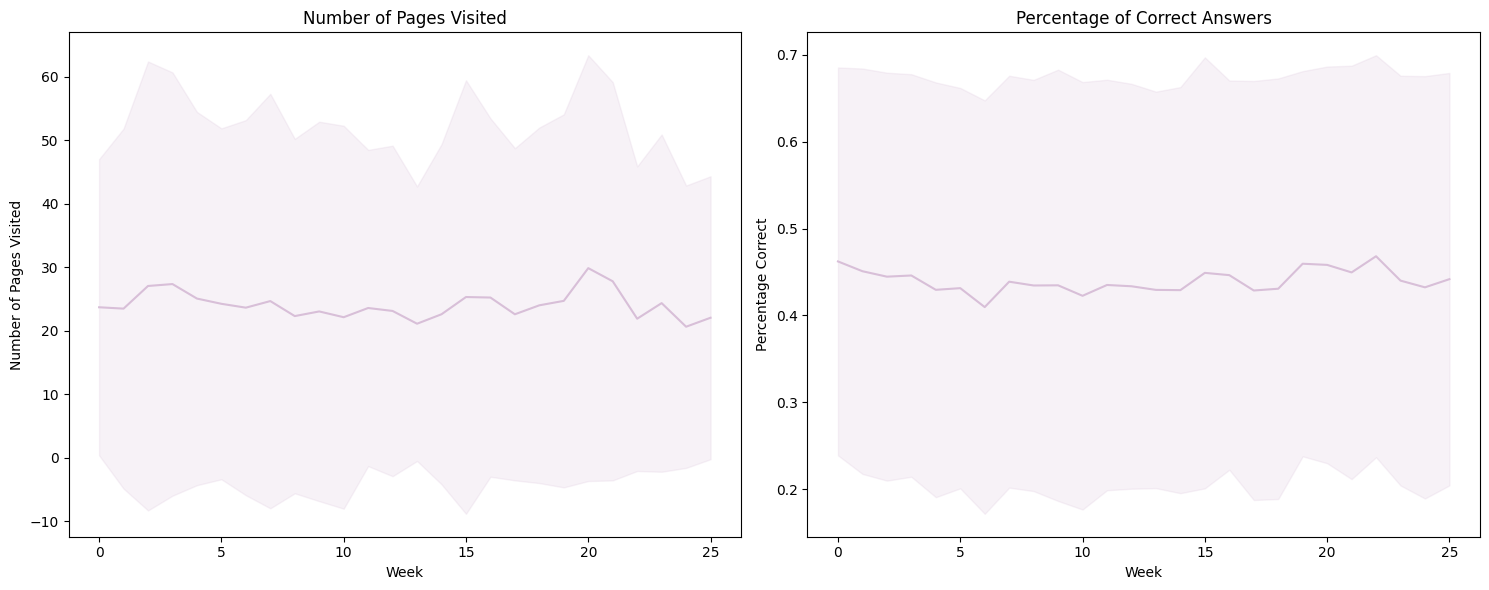

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: num_pages_visited
sns.lineplot(data=time_series_df, x="week", y="num_pages_visited", errorbar='sd', ax=axes[0], color='thistle')
axes[0].set_title('Number of Pages Visited')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Number of Pages Visited')

# Plot 2: percentage_correct
sns.lineplot(data=time_series_df, x="week", y="percentage_correct", errorbar='sd', ax=axes[1], color='thistle')
axes[1].set_title('Percentage of Correct Answers')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Percentage Correct')

# Display the plot
plt.tight_layout()
plt.show()

*Your discussion goes here*

Over ~6 months (a semester), it seems that the number of pages visited and the percentage of correct answers stay constant. This could mean that the level of engagement of users stay the same during a school semester, and that the level of difficulty stay balanced

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



In [24]:
# Your creative visualization here

questions = transactions[['user_id', 'transaction_token', 'type']]
questions = questions.merge(transactions_filtered, on=['user_id', 'transaction_token'], how='outer')

# Aggregate per user per type
questions_agg = (
    questions
    .groupby(['user_id', 'type'], as_index=False)
    .agg(num_answer=('evaluation', 'count'), num_correct=('evaluation', 'sum'))
)

# Compute percentage of correct answers
questions_agg['percentage_correct'] = questions_agg['num_correct'] / questions_agg['num_answer']

questions_agg.head()


,user_id,type,num_answer,num_correct,percentage_correct
0,387604,CLOZE_TEXT,78,58.0,0.743590
1,387604,CLOZE_TEXT_DROPDOWN,88,62.5,0.710227
2,387604,DND_GROUP,11,6.0,0.545455
3,387604,DND_IN_TEXT,11,4.5,0.409091
4,387604,DND_ORDER,7,1.5,0.214286


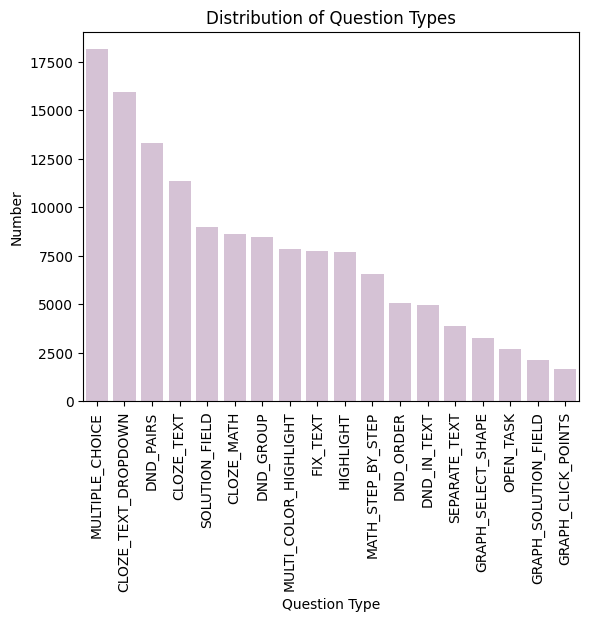

In [36]:
#plt.figure(figsize=(12,6))
sns.countplot(data=questions_agg, x='type', order=questions_agg['type'].value_counts().index, color='thistle')
plt.xlabel('Question Type')
plt.ylabel('Number')
plt.title('Distribution of Question Types')
plt.xticks(rotation=90) 
plt.show()

In [40]:
questions_agg.drop('user_id', axis=1).describe(include='all')

,type,num_answer,num_correct,percentage_correct
count,138384,138384.000000,138384.000000,138384.000000
unique,18,NaN,NaN,NaN
top,MULTIPLE_CHOICE,NaN,NaN,NaN
freq,18146,NaN,NaN,NaN
mean,NaN,10.127847,6.816684,0.661840
std,NaN,22.738937,16.809578,0.248607
min,NaN,1.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,0.500000
50%,NaN,4.000000,2.500000,0.666667
75%,NaN,10.000000,7.000000,0.833333


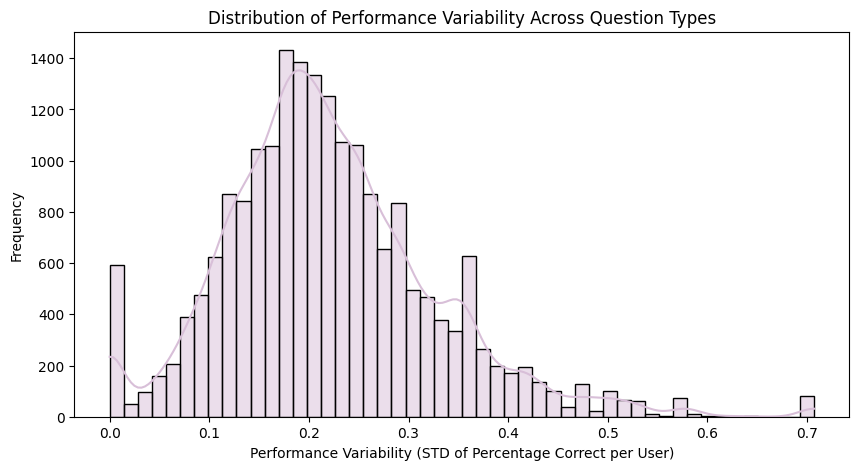

In [33]:
# Compute standard deviation of percentage_correct per user
user_performance_variability = questions_agg.groupby('user_id')['percentage_correct'].std().reset_index()
user_performance_variability.columns = ['user_id', 'performance_variability']

# Plot distribution of performance variability
plt.figure(figsize=(10,5))
sns.histplot(user_performance_variability['performance_variability'], bins=50, kde=True, color='thistle')
plt.xlabel('Performance Variability (STD of Percentage Correct per User)')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Variability Across Question Types')
plt.show()

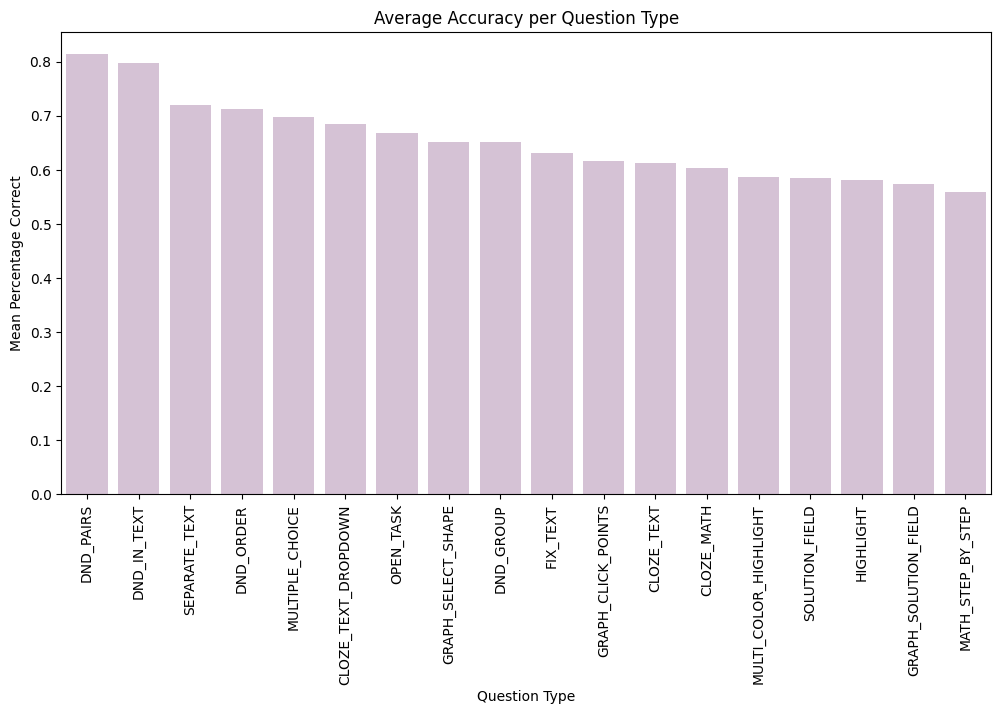

In [42]:
# Compute mean percentage_correct per question type
type_performance = questions_agg.groupby('type')['percentage_correct'].mean().reset_index()

# Sort by performance
type_performance = type_performance.sort_values(by='percentage_correct', ascending=False)

# Plot accuracy by question type
plt.figure(figsize=(12,6))
sns.barplot(data=type_performance, x='type', y='percentage_correct', color='thistle')
plt.xlabel('Question Type')
plt.ylabel('Mean Percentage Correct')
plt.title('Average Accuracy per Question Type')
plt.xticks(rotation=90)
plt.show()

In [35]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test across all question types
groups = [group['percentage_correct'].dropna().values for _, group in questions_agg.groupby('type')]

stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Statistically significant differences exist between question types.")
else:
    print("No significant difference between question types.")

Kruskal-Wallis Test: H-statistic = 13450.122, p-value = 0.000000
Statistically significant differences exist between question types.


*Your discussion goes here*

Hypothesis: The type of question influences the percentage of correctness

First the distribution of question types shows that differents types of questions are not balanced. Users are more often confronted to MCQ than to graph questions. 

The distribution of performance variability shows that a majority of users perform relatively equally between types of questions, however there are students that show a high variability (>0.3) and whose result are more dependant on the type of question. 

The Average Accuracy per question graph eveals a 20% gap between the easiest and most difficult question types. A Kruskal-Wallis test confirms that these differences in accuracy across question types are statistically significant (p-value < 0.05). This implies that the observed variations in accuracy are unlikely to be due to random chance and that question type plays a role in correctness